###  앙상블 학습

* 앙상블 학습의 유형은 보팅, 배깅, 부스팅 세가지로 나눌 수 있으며 이외에도 스태깅을 포함한 다양한 앙상블 방법이 있다.
* 보팅의 경우 서로 다른 알고리즘을 가진 분류기를 결합하는 것이고 배깅의 경우 각각의 분류기각 모두 같은 유형의 알고리즘 기반이다.
* 정형 데이터의 예측 분석 영역에서는 매우 높은 예측 성능. Bagging 과 Boosting
* 배깅 방식의 대표인 Random Forest는 뛰어난 예측 성능, 상대적으로 빠른 수행시간, 유연성 등으로 애용.
* 부스팅의 효시는 Gradient Boosting, 한 단계 발전시키면서도 시간 단축시킨 XgBoost, LightGBM이 정형 데이터의 분류 영역에서 
  활용도 확대
* 앙상블의 앙상블이라고 불리는 스태킹 기법
* 앙상블의 기본 알고리즘은 결정 트리


 Voting Classifier
 - 하드 보팅 : 다수결 원칙, 다수의 분류기가 결정한 예측값을 최종 보팅 결과값으로 선정
 - 소프트 보팅 : 분류기들의 레이블 값 결정 확률을 모두 더해서 평균하고 이들 중 가장 높은 레이블 값을 최종 보팅 결과값으로 선정

In [7]:
import pandas as pd
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
cancer = load_breast_cancer()
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier()

vo_clf = VotingClassifier(estimators=[('LR',lr_clf),('KNN',knn_clf)],voting='soft')
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,test_size=0.2,random_state=156)

vo_clf.fit(X_train,y_train)
pred = vo_clf.predict(X_test)
accuracy = accuracy_score(y_test,pred)
print(f'Voting 분류기 정확도 : {accuracy:.3f}')

classifiers = [lr_clf,knn_clf]
for classifier in classifiers:
    classifier.fit(X_train,y_train)
    pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test,pred)
    class_name = classifier.__class__.__name__
    print(f'{class_name} 정확도: {accuracy}')

Voting 분류기 정확도 : 0.947
LogisticRegression 정확도: 0.9385964912280702
KNeighborsClassifier 정확도: 0.9035087719298246


랜덤 포레스트 <br>
https://eunsukimme.github.io/ml/2019/11/26/Random-Forest/

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

feature_name_df = pd.read_csv('dataset/human_activity/features.txt',sep='\s+',header = None)
print(feature_name_df.head())
feature_name = feature_name_df.iloc[:,1].values.tolist()
print(feature_name[:10])

   0                  1
0  1  tBodyAcc-mean()-X
1  2  tBodyAcc-mean()-Y
2  3  tBodyAcc-mean()-Z
3  4   tBodyAcc-std()-X
4  5   tBodyAcc-std()-Y
['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


In [3]:
def get_human_dataset():
    feature_name_df = pd.read_csv('dataset/human_activity/features.txt',sep='\s+',header = None ,\
                                names = ['column_index','column_name'])
    feature_name = feature_name_df.iloc[:,1].values.tolist()

    X_train = pd.read_csv('dataset/human_activity/train/X_train.txt',sep='\s+',header = None)
    X_train.columns = feature_name
    X_test = pd.read_csv('dataset/human_activity/test/X_test.txt',sep='\s+',header = None)
    X_test.columns = feature_name

    y_train = pd.read_csv('dataset/human_activity/train/y_train.txt',sep='\s+',header = None, names = ['action'])
    y_test = pd.read_csv('dataset/human_activity/test/y_test.txt',sep='\s+',header = None, names = ['action'])
    return X_train, X_test,y_train,y_test
X_train, X_test,y_train,y_test = get_human_dataset()

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

rf_clf = RandomForestClassifier(random_state = 0)
rf_clf.fit(X_train,y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test,pred)
print(f'rf 정확도 : {accuracy:.3f}')

rf 정확도 : 0.925


In [17]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[50,100],
    'max_depth':[3,5,10],
    'min_samples_leaf':[2,5,10],
    'min_samples_split':[2,5,10]
}

rf = RandomForestClassifier(random_state=0)
# rf로 객체 생성 후 GridSearchCV 수행
grid_clf = GridSearchCV(rf,param_grid= params,cv=3,refit=True,scoring='accuracy')
grid_clf.fit(X_train,y_train)
scores_df = pd.DataFrame(grid_clf.cv_results_)
display(scores_df[['params','mean_test_score','rank_test_score']])
print('최적 하이퍼 파라미터',grid_clf.best_params_)
print('정확도 : ',grid_clf.best_score_)
grid_pred = grid_clf.best_estimator_.predict(X_test)
accuracy = accuracy_score(y_test,grid_pred)
print(f'테스트 데이터 정확도 : {accuracy:.3f}')



,params,mean_test_score,rank_test_score
0,"{'max_depth': 3, 'min_samples_leaf': 2, 'min_s...",0.886563,37
1,"{'max_depth': 3, 'min_samples_leaf': 2, 'min_s...",0.882619,46
2,"{'max_depth': 3, 'min_samples_leaf': 2, 'min_s...",0.886563,37
3,"{'max_depth': 3, 'min_samples_leaf': 2, 'min_s...",0.882619,46
4,"{'max_depth': 3, 'min_samples_leaf': 2, 'min_s...",0.886563,37
5,"{'max_depth': 3, 'min_samples_leaf': 2, 'min_s...",0.882619,46
6,"{'max_depth': 3, 'min_samples_leaf': 5, 'min_s...",0.886563,37
7,"{'max_depth': 3, 'min_samples_leaf': 5, 'min_s...",0.882619,46
8,"{'max_depth': 3, 'min_samples_leaf': 5, 'min_s...",0.886563,37
9,"{'max_depth': 3, 'min_samples_leaf': 5, 'min_s...",0.882619,46


최적 하이퍼 파라미터 {'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 2, 'n_estimators': 100}
정확도 :  0.9163497892016864
테스트 데이터 정확도 : 0.924


In [23]:
best_grid = grid_clf.best_estimator_
for name, value in zip(X_train.columns.tolist(),best_grid.feature_importances_):
    print(f'{name} : {value:.5f}')

tBodyAcc-mean()-X : 0.00001
tBodyAcc-mean()-Y : 0.00016
tBodyAcc-mean()-Z : 0.00007
tBodyAcc-std()-X : 0.00386
tBodyAcc-std()-Y : 0.00030
tBodyAcc-std()-Z : 0.00037
tBodyAcc-mad()-X : 0.00390
tBodyAcc-mad()-Y : 0.00033
tBodyAcc-mad()-Z : 0.00013
tBodyAcc-max()-X : 0.01921
tBodyAcc-max()-Y : 0.00013
tBodyAcc-max()-Z : 0.00004
tBodyAcc-min()-X : 0.00007
tBodyAcc-min()-Y : 0.00016
tBodyAcc-min()-Z : 0.00012
tBodyAcc-sma() : 0.00026
tBodyAcc-energy()-X : 0.00290
tBodyAcc-energy()-Y : 0.00032
tBodyAcc-energy()-Z : 0.00035
tBodyAcc-iqr()-X : 0.00217
tBodyAcc-iqr()-Y : 0.00031
tBodyAcc-iqr()-Z : 0.00009
tBodyAcc-entropy()-X : 0.00103
tBodyAcc-entropy()-Y : 0.00011
tBodyAcc-entropy()-Z : 0.00021
tBodyAcc-arCoeff()-X,1 : 0.00012
tBodyAcc-arCoeff()-X,2 : 0.00011
tBodyAcc-arCoeff()-X,3 : 0.00002
tBodyAcc-arCoeff()-X,4 : 0.00010
tBodyAcc-arCoeff()-Y,1 : 0.00006
tBodyAcc-arCoeff()-Y,2 : 0.00007
tBodyAcc-arCoeff()-Y,3 : 0.00002
tBodyAcc-arCoeff()-Y,4 : 0.00002
tBodyAcc-arCoeff()-Z,1 : 0.00005
tBodyA

In [42]:
df = pd.DataFrame(X_train.columns.tolist(),columns=['name'])
df['importance']=best_grid.feature_importances_
s_df = df.sort_values(by='importance',ascending=False)[:20]
s_df

,name,importance
558,"angle(X,gravityMean)",0.039434
41,tGravityAcc-mean()-Y,0.031072
52,tGravityAcc-min()-X,0.030319
559,"angle(Y,gravityMean)",0.029138
56,tGravityAcc-energy()-X,0.026150
53,tGravityAcc-min()-Y,0.026039
49,tGravityAcc-max()-X,0.025362
40,tGravityAcc-mean()-X,0.024010
381,"fBodyAccJerk-bandsEnergy()-1,8",0.022732
50,tGravityAcc-max()-Y,0.020080


<AxesSubplot:xlabel='importance', ylabel='name'>

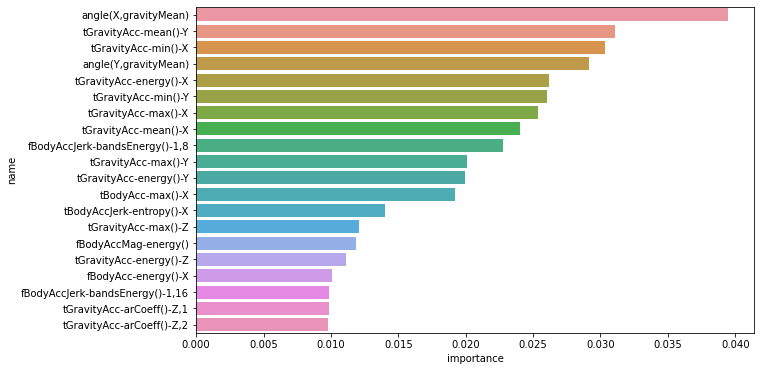

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (10,6))
sns.barplot(x=s_df['importance'],y=s_df['name'])

GBM(Gradient Boosting Machine)
- 부스팅 알고리즘은 여러 개의 약한 학습기(weak learner)를 순차적으로 학습-예측하면서 잘못 예측한 데이터에 가중치 부여를 통해 오류를 개선해 나가면서 학습하는 방식
- 가중치 업데이트를 경사 하강법(Gradient Descent)를 이용한다.
- 분류는 물론이고 회귀도 가능
- 파라미터 : n_estimators, max_depth, max_features
 - loss : 경사하강법에서 사용할 비용함수 지정. 기본값 deviance 적용
 - learning_rate : GBM이 학습할 때마다 적용할 학습률.오류값 보정 시 적용하는 계수로 0 ~ 1 사이의 값 지정. 기본값은 0.1. 작게 설정하면 예측성능이 높아지나 수행시간이 오래 걸리고 큰 값을 적용하면 예측 성능이 떨어질 가능성이 높으나 빠른 수행이 가능. n_estimator와 상호 보완적으로 조합해 사용
 - n_estimator : weak learner의 개수
 - subsample : weak learner가 학습에 사용하는 데이터의 샘플링 비율. 기본값은 1


In [4]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import time

X_train,X_test, y_train,y_test = get_human_dataset()

start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state = 0)
gb_clf.fit(X_train,y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test,gb_pred)
print(f'GBM 정확도 : {gb_accuracy:.3f}')
print(f'GBM 수행 시간 : {time.time()-start_time}')

C:\anaconda3\envs\cakd5\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GBM 정확도 : 0.939
GBM 수행 시간 : 480.10976552963257


In [2]:
def get_human_dataset():
    feature_name_df = pd.read_csv('dataset/human_activity/features.txt',sep='\s+',header = None ,\
                                names = ['column_index','column_name'])
    feature_name = feature_name_df.iloc[:,1].values.tolist()

    X_train = pd.read_csv('dataset/human_activity/train/X_train.txt',sep='\s+',header = None)
    X_train.columns = feature_name
    X_test = pd.read_csv('dataset/human_activity/test/X_test.txt',sep='\s+',header = None)
    X_test.columns = feature_name

    y_train = pd.read_csv('dataset/human_activity/train/y_train.txt',sep='\s+',header = None, names = ['action'])
    y_test = pd.read_csv('dataset/human_activity/test/y_test.txt',sep='\s+',header = None, names = ['action'])
    return X_train, X_test,y_train,y_test

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score,recall_score,f1_score,roc_auc_score
def scores(y_test,pred=None,pred_proba=None):
    con_mat = confusion_matrix(y_test,pred)
    acc = accuracy_score(y_test,pred)
    pre = precision_score(y_test,pred,average='micro')
    rec = recall_score(y_test,pred,average='micro')
    f1 = f1_score(y_test,pred,average='micro')
    print(f'오차행렬 : \n{con_mat}\n정확도 : {acc:.4f}, 정밀도 : {pre:.4f}, 재현율 : {rec:.4f}, f1 점수 : {f1:.4f}')


In [4]:
# [과제] 상기 케이스에 대하여 성능개선을 위한 튜닝을 수행하세요.
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import time
import pandas as pd
X_train,X_test, y_train,y_test = get_human_dataset()

prams = {
    'n_estimators':[50,100,300],
    'learning_rate':[0.05,0.10]}
gbm_clf = GradientBoostingClassifier(random_state=12)
grid_gbm = GridSearchCV(gbm_clf,param_grid=prams,scoring= 'accuracy',cv=3,refit=True,n_jobs=-1)
grid_gbm.fit(X_train,y_train)

C:\anaconda3\envs\cakd5\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=12),
             n_jobs=6,
             param_grid={'learning_rate': [0.05, 0.1],
                         'n_estimators': [50, 100, 300]},
             scoring='accuracy')

In [19]:
print(f'최적 파라미터 : {grid_gbm.best_params_}, 최적 파라미터 정확도 : {grid_gbm.best_score_:.3f}')
best_grid = grid_gbm.best_estimator_
pred = best_grid.predict(X_test)
pred_proba = best_grid.predict_proba(X_test)[:,1]
print('테스트 정확도 : ',round(accuracy_score(y_test,pred),4))

최적 파라미터 : {'learning_rate': 0.1, 'n_estimators': 300}, 최적 파라미터 정확도 : 0.913
테스트 정확도 :  0.9416
